In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime,timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func



In [4]:
# # Create engine using the hawaii.sqlite database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)


In [5]:
Base = automap_base() # Declare a Base using `automap_base()`
Base.prepare(engine, reflect=True) # Use the Base class to reflect the database tables


In [6]:
#View classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
Measurement = Base.classes.measurement # Assign the measurement class to a variable called `measurement`
Stations = Base.classes.station # Assign the measurement class to a variable called `Stationsb`

In [8]:
#Create session link from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
print(f"The Most Recent Date in the date set is",most_recent_date)

The Most Recent Date in the date set is ('2017-08-23',)


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
previous_year_date =dt.date(2017,8,23)- dt.timedelta(days=365)

print(f" The date one year from the last date in the dataset is :",previous_year_date )



 The date one year from the last date in the dataset is : 2016-08-23


In [11]:
# Perform a query to retrieve the data and precipitation scores
results=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year_date).all()

In [12]:
resultsDF=pd.DataFrame(results, columns = ['date', 'precipitation'])
resultsDF.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [13]:
# Sort the dataframe by date

resultsDF=resultsDF.sort_values("date")
resultsDF.head()

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


In [14]:
resultsDF.dtypes   #get datatypes for each column 

date              object
precipitation    float64
dtype: object

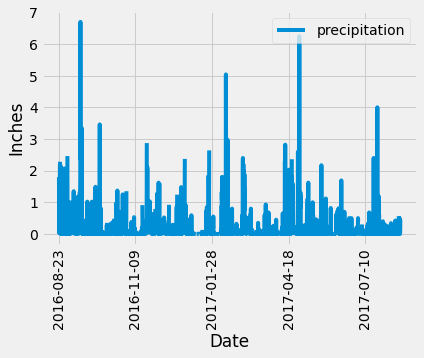

In [15]:
#plot values from results 
resultsDF.plot(x='date', y='precipitation',rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend (loc='upper right')
plt.show()

In [16]:
resultsDF.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
#look at columns for station table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [18]:
#Look at columns for measurement table
inspector = inspect(engine)
columns=inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [19]:
# Design a query to calculate the total number stations in the dataset

number_of_stations = session.query((Stations.station)).distinct().count()
print(f"The total number of stations is:",number_of_stations )

The total number of stations is: 9


In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
              order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
              order_by(func.count(Measurement.station).desc()).first()
print(f" The most active station:", active_station)

 The most active station: ('USC00519281', 2772)


In [22]:
active_station_results = session.query(func.min(Measurement.tobs),func.min(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == active_station[0] ).all()
active_station_results


[(54.0, 54.0, 71.66378066378067)]

Text(0.5, -1.340000000000014, 'Temperature Observed')

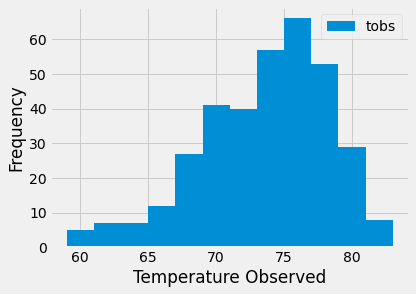

In [23]:
from pandas.plotting import table
# Using the most active station id 
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results_last_twelve = session.query(Measurement.tobs).\
filter(Measurement.station == active_station[0] ).\
filter(Measurement.date >= previous_year_date).all()

resultsDF  = pd.DataFrame (results_last_twelve, columns=['tobs']) # create data frame for results

#plot results
resultsDF.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel('Temperature Observed')

# Close session

In [24]:
# Close Session
session.close()